In [1]:
from __future__ import (unicode_literals, print_function, absolute_import,
                        division)

%matplotlib inline

from ema_workbench import (Model,MultiprocessingEvaluator, SequentialEvaluator, Policy,
                           Scenario,IntegerParameter)

from ema_workbench.util import ema_logging
from problem_formulation import get_model_for_problem_formulation
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from SALib.analyze import sobol

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

C:\Program Files\Python\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Program Files\Python\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [2]:
run_Scenarios = False
n_scenarios = 100

In [5]:
if __name__ == '__main__':
    ema_logging.log_to_stderr(ema_logging.INFO)
    dike_model, planning_steps = get_model_for_problem_formulation(1)  # ,Mode='Switch_unc_lev'
    
    if run_Scenarios:
        print('Startet evaluating at:',datetime.now())
        with MultiprocessingEvaluator(dike_model) as evaluator:
            results_sens = evaluator.perform_experiments(scenarios=n_scenarios,
                                                         uncertainty_sampling='sobol',
                                                         policies=1,
                                                         reporting_frequency=100)
            
        print('Stopped evaluating at:',datetime.now())
        experiments, outcomes = results_sens
        outcomes = pd.DataFrame(outcomes)
        experiments.to_csv('./results/exp_sens_p0_{}s_sobol.csv'.format(n_scenarios))
        outcomes.to_csv('./results/out_sens_p0_{}s_sobol.csv'.format(n_scenarios))
        
    else:
        experiments = pd.read_csv('./results/exp_sens_p0_{}s_sobol.csv'.format(n_scenarios),index_col=0)
        outcomes = pd.read_csv('./results/out_sens_p0_{}s_sobol.csv'.format(n_scenarios),index_col=0)
        

In [6]:
list(x.name for x in dike_model.levers)

['0_RfR 0',
 '0_RfR 1',
 '0_RfR 2',
 '1_RfR 0',
 '1_RfR 1',
 '1_RfR 2',
 '2_RfR 0',
 '2_RfR 1',
 '2_RfR 2',
 '3_RfR 0',
 '3_RfR 1',
 '3_RfR 2',
 '4_RfR 0',
 '4_RfR 1',
 '4_RfR 2',
 'EWS_DaysToThreat',
 'A.1_DikeIncrease 0',
 'A.1_DikeIncrease 1',
 'A.1_DikeIncrease 2',
 'A.2_DikeIncrease 0',
 'A.2_DikeIncrease 1',
 'A.2_DikeIncrease 2',
 'A.3_DikeIncrease 0',
 'A.3_DikeIncrease 1',
 'A.3_DikeIncrease 2',
 'A.4_DikeIncrease 0',
 'A.4_DikeIncrease 1',
 'A.4_DikeIncrease 2',
 'A.5_DikeIncrease 0',
 'A.5_DikeIncrease 1',
 'A.5_DikeIncrease 2']

In [5]:
problem = get_SALib_problem(dike_model.uncertainties)
Si = sobol.analyze(problem, outcomes['Expected Number of Deaths'].values,
                   calc_second_order=True, print_to_console=False)

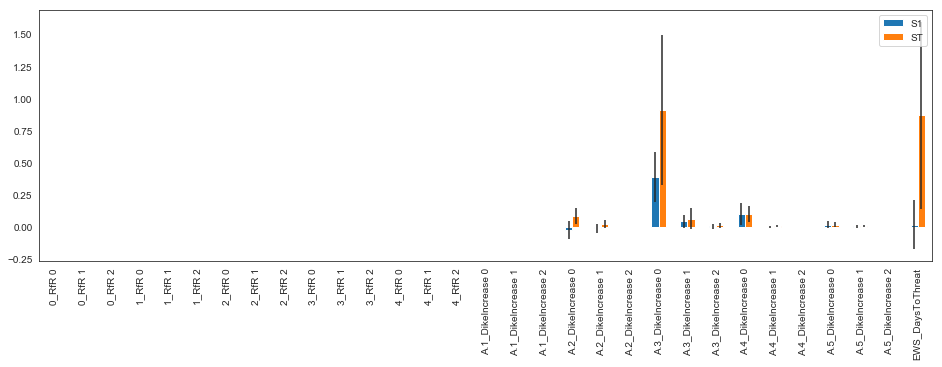

In [6]:
scores_filtered = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(scores_filtered, index=problem['names'])

sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(16,6)
fig.subplots_adjust(bottom=0.3)
plt.show()

In [7]:
Si_df

,ST,ST_conf,S1,S1_conf
0_RfR 0,0.000000,0.000000,0.000000,0.000000
0_RfR 1,0.000000,0.000000,0.000000,0.000000
0_RfR 2,0.000000,0.000000,0.000000,0.000000
1_RfR 0,0.000000,0.000000,0.000000,0.000000
1_RfR 1,0.000000,0.000000,0.000000,0.000000
1_RfR 2,0.000000,0.000000,0.000000,0.000000
2_RfR 0,0.000000,0.000000,0.000000,0.000000
2_RfR 1,0.000000,0.000000,0.000000,0.000000
2_RfR 2,0.000000,0.000000,0.000000,0.000000
3_RfR 0,0.000000,0.000000,0.000000,0.000000


In [7]:
evaluator.perform_experiments?

Object `evaluator.perform_experiments` not found.
